# **`1. BUSINESS UNDERSTANDING`**

Estimating the prevalence and mortality of Tuberculosis by country

Incidence -  How many new cases occur over Time  
Prevalence - How widespread a condition is

# **`2. DATA UNDERSTANDING`**

In [37]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly .express as px
import warnings
import math
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None) # To display all the columns
pd.set_option('display.float_format', '{:,.2f}'.format) # surpress scientific notation and Add 1000 comma separator
pd.set_option("display.max_rows", None)


In [22]:
# Load data
df = pd.read_csv("..\Data\TB_Burden_Country.csv")

df.sample(3)

,Country or territory name,ISO 2-character country/territory code,ISO 3-character country/territory code,ISO numeric country/territory code,Region,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",Estimated prevalence of TB (all forms),"Estimated prevalence of TB (all forms), low bound","Estimated prevalence of TB (all forms), high bound",Method to derive prevalence estimates,"Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population","Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound","Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound","Estimated number of deaths from TB (all forms, excluding HIV)","Estimated number of deaths from TB (all forms, excluding HIV), low bound","Estimated number of deaths from TB (all forms, excluding HIV), high bound","Estimated mortality of TB cases who are HIV-positive, per 100 000 population","Estimated mortality of TB cases who are HIV-positive, per 100 000 population, low bound","Estimated mortality of TB cases who are HIV-positive, per 100 000 population, high bound",Estimated number of deaths from TB in people who are HIV-positive,"Estimated number of deaths from TB in people who are HIV-positive, low bound","Estimated number of deaths from TB in people who are HIV-positive, high bound",Method to derive mortality estimates,Estimated incidence (all forms) per 100 000 population,"Estimated incidence (all forms) per 100 000 population, low bound","Estimated incidence (all forms) per 100 000 population, high bound",Estimated number of incident cases (all forms),"Estimated number of incident cases (all forms), low bound","Estimated number of incident cases (all forms), high bound",Method to derive incidence estimates,Estimated HIV in incident TB (percent),"Estimated HIV in incident TB (percent), low bound","Estimated HIV in incident TB (percent), high bound",Estimated incidence of TB cases who are HIV-positive per 100 000 population,"Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound","Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound",Estimated incidence of TB cases who are HIV-positive,"Estimated incidence of TB cases who are HIV-positive, low bound","Estimated incidence of TB cases who are HIV-positive, high bound",Method to derive TBHIV estimates,"Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"
2779,Mali,ML,MLI,466,AFR,2001,10562768,121.00,65.00,195.00,"13,000.00","6,900.00","21,000.00",predicted,14.00,9.20,17.00,"1,500.00",970.00,"1,800.00",2.50,1.30,4.10,270.00,140.00,440.00,Indirect,76.00,74.00,77.00,"8,000.00","7,800.00","8,100.00",Mortality,8.50,5.90,11.00,6.40,4.30,8.50,680.00,450.00,900.00,NaN,56.00,55.00,57.00
3170,Netherlands Antilles,AN,ANT,530,AMR,1999,180623,4.50,1.30,9.60,8.20,2.40,17.00,predicted,0.58,0.57,0.60,1.10,1.00,1.10,0.00,NaN,NaN,0.00,NaN,NaN,VR,2.50,2.20,2.90,4.60,4.00,5.20,High income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.00,77.00,99.00
4836,United States of America,US,USA,840,AMR,1994,265070064,13.00,5.90,24.00,"35,000.00","16,000.00","62,000.00",predicted,0.57,0.56,0.58,"1,500.00","1,500.00","1,500.00",0.11,0.08,0.14,290.00,210.00,380.00,VR,10.00,9.80,11.00,"28,000.00","26,000.00","29,000.00",High income,5.50,5.10,6.00,0.57,0.54,0.61,"1,500.00","1,400.00","1,600.00",NaN,88.00,84.00,93.00


## **Data Inspection**

In [23]:
# Get summary statistics for columns with n umeric data types
df.describe(exclude="O").T

,count,mean,std,min,25%,50%,75%,max
ISO numeric country/territory code,"5,120.00",433.58,255.12,4.00,212.00,430.00,646.00,894.00
Year,"5,120.00","2,001.55",6.93,"1,990.00","1,996.00","2,002.00","2,008.00","2,013.00"
Estimated total population number,"5,120.00","29,156,711.61","118,372,539.24","1,129.00","560,119.00","5,172,117.50","17,524,043.75","1,385,566,537.00"
Estimated prevalence of TB (all forms) per 100 000 population,"5,120.00",194.39,259.02,0.00,23.00,85.00,272.00,"1,762.00"
"Estimated prevalence of TB (all forms) per 100 000 population, low bound","5,100.00",101.82,145.26,0.11,10.00,40.00,139.00,"1,316.00"
"Estimated prevalence of TB (all forms) per 100 000 population, high bound","5,100.00",321.01,421.33,0.77,43.00,147.00,447.00,"3,038.00"
Estimated prevalence of TB (all forms),"5,120.00","66,543.32","324,948.75",0.00,380.00,"4,300.00","27,000.00","4,600,000.00"
"Estimated prevalence of TB (all forms), low bound","5,100.00","46,159.15","271,191.76",0.02,170.00,"2,100.00","14,000.00","4,000,000.00"
"Estimated prevalence of TB (all forms), high bound","5,100.00","93,197.91","393,863.12",0.16,720.00,"7,700.00","45,000.00","5,200,000.00"
"Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population","5,120.00",20.17,32.89,0.00,1.30,5.40,25.00,278.00


In [24]:
# Get summary statistics for columns with object data type
df.describe(include="O").T

,count,unique,top,freq
Country or territory name,5120,219,Afghanistan,24
ISO 2-character country/territory code,5096,218,AF,24
ISO 3-character country/territory code,5120,219,AFG,24
Region,5120,6,EUR,1281
Method to derive prevalence estimates,5120,5,predicted,4760
Method to derive mortality estimates,5120,3,VR,2186
Method to derive incidence estimates,2987,8,High income,1568


In [25]:
# Check for duplicates in the dataset
print("We have", df.duplicated().sum(), "Duplicated entries")

We have 0 Duplicated entries


In [26]:
# Check for null values
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False).reset_index()

,index,0
0,Method to derive TBHIV estimates,5120
1,Method to derive incidence estimates,2133
2,Estimated number of deaths from TB in people w...,1942
3,Estimated number of deaths from TB in people w...,1942
4,Estimated mortality of TB cases who are HIV-po...,1942
5,Estimated mortality of TB cases who are HIV-po...,1942
6,Estimated incidence of TB cases who are HIV-po...,1478
7,Estimated incidence of TB cases who are HIV-po...,1478
8,"Estimated HIV in incident TB (percent), high b...",1478
9,Estimated incidence of TB cases who are HIV-po...,1478


In [27]:
# Get information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 47 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Country or territory name                                                                       5120 non-null   object 
 1   ISO 2-character country/territory code                                                          5096 non-null   object 
 2   ISO 3-character country/territory code                                                          5120 non-null   object 
 3   ISO numeric country/territory code                                                              5120 non-null   int64  
 4   Region                                                                                          5120 non-null   object 
 5   Year         

# Notes

- **Method to derive TBHIV estimates column has no values**. it's null

## **Data Exploration**

In [28]:
# Get Numeric columns
numeric_columns_data = df.select_dtypes(include=["float", "int64"])
numeric_columns_data.head()

,ISO numeric country/territory code,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",Estimated prevalence of TB (all forms),"Estimated prevalence of TB (all forms), low bound","Estimated prevalence of TB (all forms), high bound","Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population","Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound","Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound","Estimated number of deaths from TB (all forms, excluding HIV)","Estimated number of deaths from TB (all forms, excluding HIV), low bound","Estimated number of deaths from TB (all forms, excluding HIV), high bound","Estimated mortality of TB cases who are HIV-positive, per 100 000 population","Estimated mortality of TB cases who are HIV-positive, per 100 000 population, low bound","Estimated mortality of TB cases who are HIV-positive, per 100 000 population, high bound",Estimated number of deaths from TB in people who are HIV-positive,"Estimated number of deaths from TB in people who are HIV-positive, low bound","Estimated number of deaths from TB in people who are HIV-positive, high bound",Estimated incidence (all forms) per 100 000 population,"Estimated incidence (all forms) per 100 000 population, low bound","Estimated incidence (all forms) per 100 000 population, high bound",Estimated number of incident cases (all forms),"Estimated number of incident cases (all forms), low bound","Estimated number of incident cases (all forms), high bound",Estimated HIV in incident TB (percent),"Estimated HIV in incident TB (percent), low bound","Estimated HIV in incident TB (percent), high bound",Estimated incidence of TB cases who are HIV-positive per 100 000 population,"Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound","Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound",Estimated incidence of TB cases who are HIV-positive,"Estimated incidence of TB cases who are HIV-positive, low bound","Estimated incidence of TB cases who are HIV-positive, high bound",Method to derive TBHIV estimates,"Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"
0,4,1990,11731193,306.00,156.00,506.00,"36,000.00","18,000.00","59,000.00",37.00,24.00,54.00,"4,300.00","2,800.00","6,400.00",0.04,0.03,0.05,5.00,4.10,6.00,189.00,157.00,238.00,"22,000.00","18,000.00","28,000.00",0.06,0.04,0.08,0.11,0.08,0.14,12.00,9.40,16.00,NaN,20.00,15.00,24.00
1,4,1991,12612043,343.00,178.00,562.00,"43,000.00","22,000.00","71,000.00",46.00,29.00,61.00,"5,800.00","3,700.00","7,700.00",0.06,0.05,0.08,8.00,6.20,10.00,191.00,167.00,227.00,"24,000.00","21,000.00","29,000.00",0.07,0.06,0.09,0.13,0.11,0.16,17.00,14.00,20.00,NaN,96.00,80.00,110.00
2,4,1992,13811876,371.00,189.00,614.00,"51,000.00","26,000.00","85,000.00",54.00,34.00,68.00,"7,400.00","4,700.00","9,400.00",0.08,0.06,0.10,11.00,8.30,14.00,191.00,171.00,217.00,"26,000.00","24,000.00","30,000.00",0.08,0.07,0.10,0.16,0.14,0.18,22.00,19.00,24.00,NaN,NaN,NaN,NaN
3,4,1993,15175325,392.00,194.00,657.00,"59,000.00","30,000.00","100,000.00",60.00,38.00,73.00,"9,100.00","5,800.00","11,000.00",0.11,0.09,0.14,17.00,13.00,21.00,189.00,171.00,209.00,"29,000.00","26,000.00","32,000.00",0.10,0.09,0.11,0.19,0.17,0.21,28.00,25.00,31.00,NaN,NaN,NaN,NaN
4,4,1994,16485018,410.00,198.00,697.00,"68,000.00","33,000.00","110,000.00",65.00,41.00,79.00,"11,000.00","6,800.00","13,000.00",0.13,0.11,0.16,22.00,17.00,27.00,188.00,169.00,208.00,"31,000.00","28,000.00","34,000.00",0.11,0.10,0.13,0.21,0.18,0.24,35.00,30.00,39.00,NaN,NaN,NaN,NaN


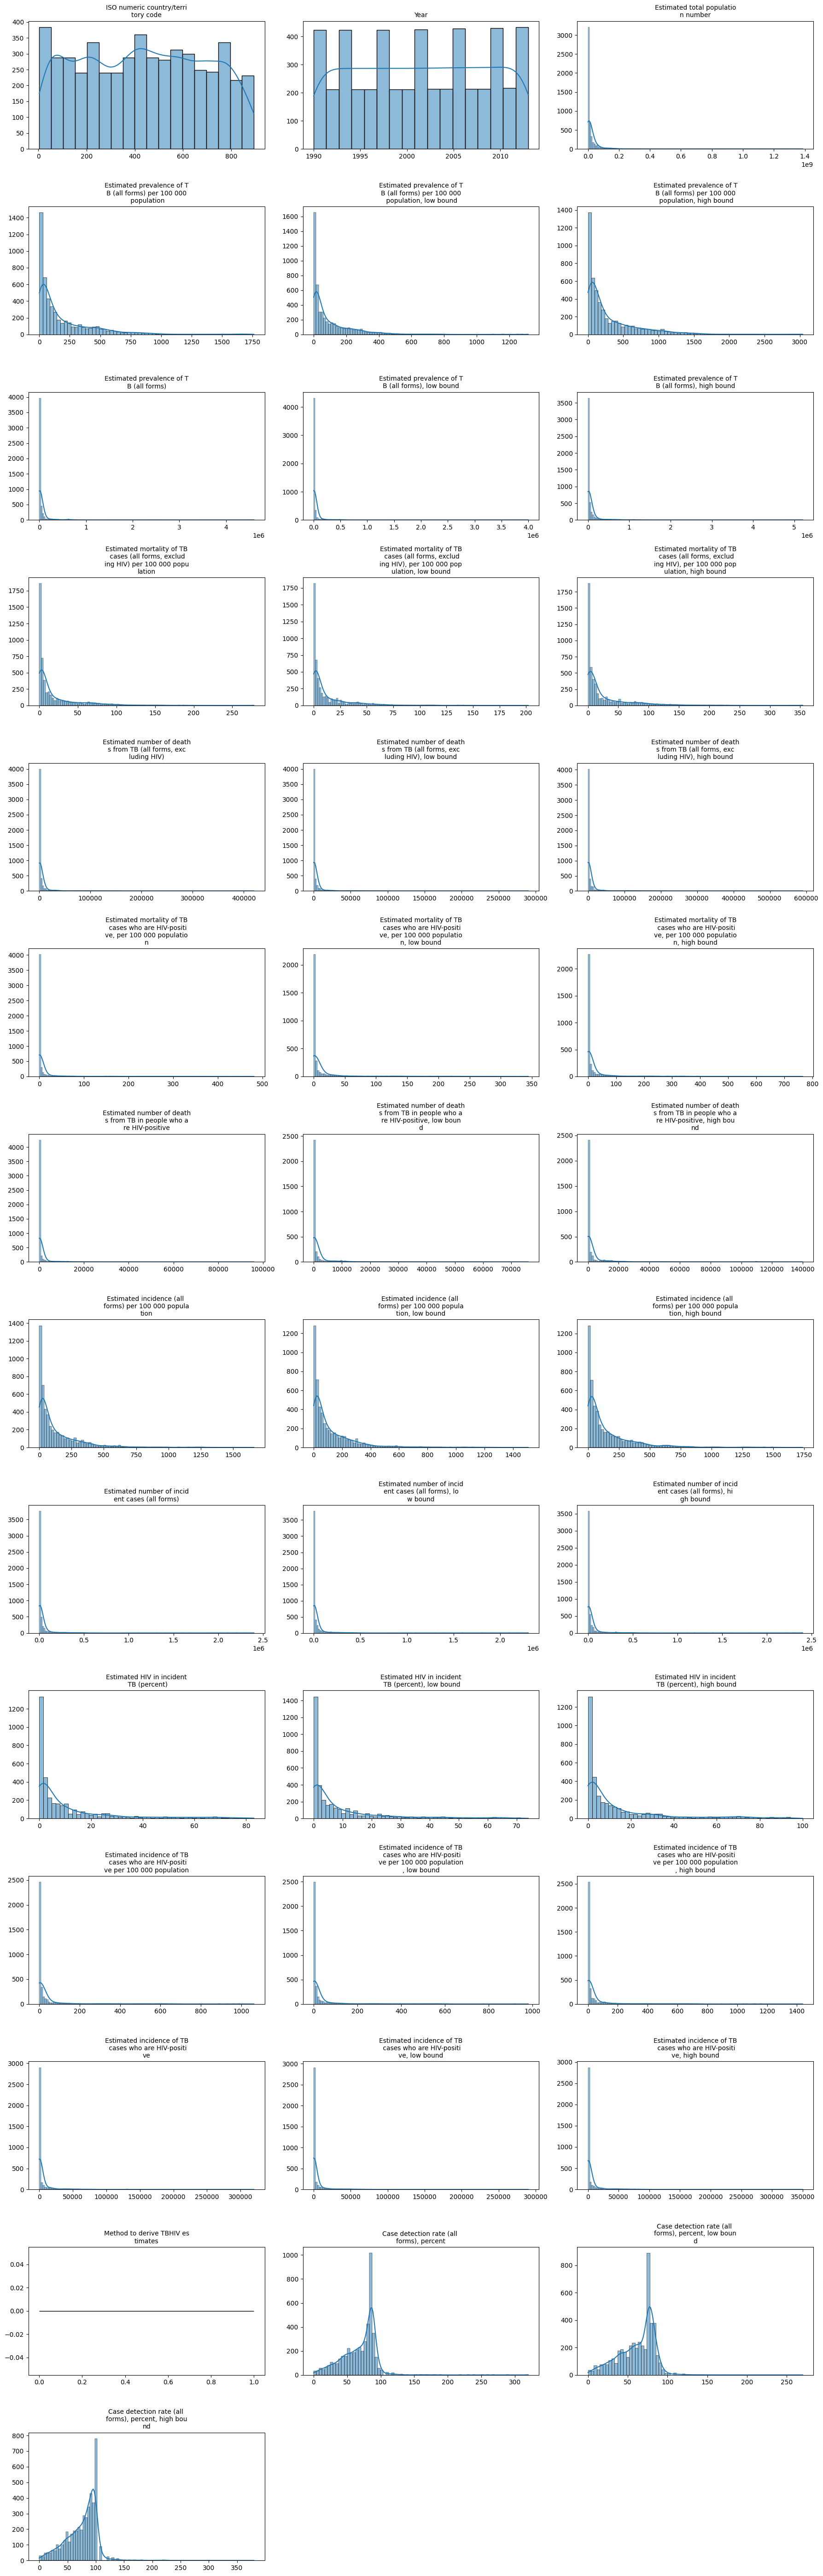

In [81]:
# Select numeric columns
numeric_columns_data = df.select_dtypes(include='number')
num_cols = len(numeric_columns_data.columns)

# Subplot layout
cols = 3
rows = math.ceil(num_cols / cols)

# Create subplots
plt.figure(figsize=(cols * 6, rows * 4))

for i, column in enumerate(numeric_columns_data.columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data=numeric_columns_data, x=column, kde=True)

    # Improve title formatting:
    # 1. Replace underscores with spaces
    # 2. Wrap long titles to fit within the subplot
    clean_title = column.replace('_', ' ')
    wrapped_title = '\n'.join([clean_title[i:i+25] for i in range(0, len(clean_title), 25)])
    
    plt.title(wrapped_title, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [76]:
# Select only non-numeric data types
cat_cols_data = df.select_dtypes(exclude="number")


# Print unique counts for each categorical column to identify high cardinality columns
for col in cat_cols_data.columns:
    unique_count = len(cat_cols_data[col].unique())
    print(f"{col}: {unique_count} unique values")


Country or territory name: 219 unique values
ISO 2-character country/territory code: 219 unique values
ISO 3-character country/territory code: 219 unique values
Region: 6 unique values
Method to derive prevalence estimates: 5 unique values
Method to derive mortality estimates: 3 unique values
Method to derive incidence estimates: 9 unique values


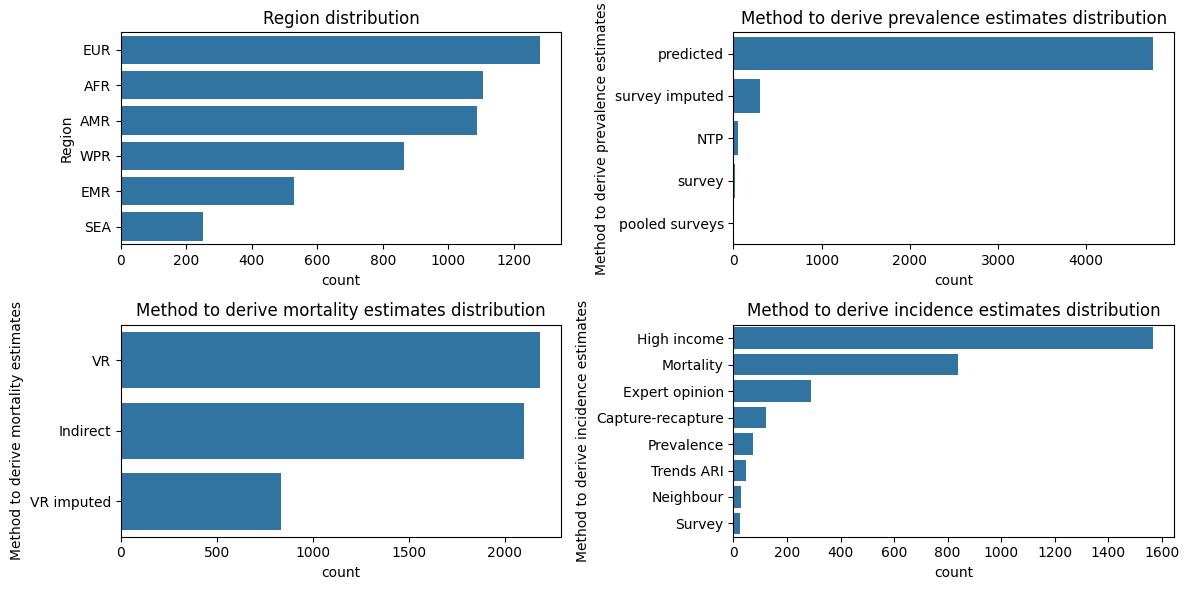

In [78]:
# Drop high-cardinality columns
cat_cols = cat_cols_data.drop([
    "Country or territory name",
    "ISO 2-character country/territory code",
    "ISO 3-character country/territory code"
], axis=1)

# Setup grid for subplots
len_cat_cols = len(cat_cols.columns)
cols = 2
rows = math.ceil(len_cat_cols / cols)

plt.figure(figsize=(cols * 6, rows * 3))

for i, column in enumerate(cat_cols.columns, 1):
    plt.subplot(rows, cols, i)
    
    # Get sorted order of categories by frequency
    sorted_order = cat_cols[column].value_counts().index
    
    sns.countplot(data=cat_cols, y=column, order=sorted_order)
    plt.title(f"{column} distribution")

plt.tight_layout()
plt.show()